# <font color='#000000'>ANALYSING THE RELATION BETWEEN POPULATION AND GDP<font><a class='anchor' id='top'></a>

### Table of Contents
    
* [1. Aim](#chapter1)

* [2. Data Health Review](#chapter2)
	* [2.1 Importing Libraries](#chapter2.1)
	* [2.2 Importing the Data](#chapter2.2)
	* [2.3 Data Cleaning and Preprocessing](#chapter2.3)
    * [2.4 Data Statistical Summary](#chapter2.4)

* [3. Exploratory Data Analysis](#chapter3)
	* [3.1 Data Frequency Understanding](#chapter3.1)
	* [3.2 Univariate Analysis](#chapter3.2)
        * [3.2.1 Treatment of Outliers](#chapter3.2.1)
	* [3.3 Bivariate Analysis](#chapter3.3)
	
* [4. Spliting the data and Fitting the Model](#chapter4)
	* [4.1 Converting Categorical Variables as Binary Vectors](#chapter4.1)
	* [4.2 Spliting the Data](#chapter4.2)
    * [4.3 Fitting the Linear Regression algorithm in model](#chapter4.3)
    

* [5. Reading Using Metrics](#chapter5)
	* [5.1 Reading using SKLearn Metrics](#chapter5.1)
	* [5.2 Reading using Statsmodel Metrics](#chapter5.2)

* [6. Conclusion](#chapter6)

## 1. Aim  <a class="anchor" id="chapter1"></a>

**Aim**

The aim of analyzing the relation between population and GDP using a linear regression model is to gain a deeper understanding of how changes in population size relate to changes in the economic output of a country or region.

**Understanding**

By employing a linear regression model to examine the relationship between population and GDP, we can quantify the extent to which changes in population contribute to variations in GDP. The model allows us to determine the direction (positive or negative) and strength of the relationship, as well as estimate the magnitude of the effect. This understanding can help in making informed decisions and predictions about economic growth, resource allocation, and policy planning, among other areas.academic outcomes.

**IMF GDP** is calculated by the International Monetary Fund (IMF) by adding up the value of all final goods and services produced in a country in a given year.

**UN GDP** is calculate Data Survey on Professional, by the United Nations (UN), includes the value of non-market goods and services, such as unpaid household work.

**GDP per capita** of a country divided by its population. It is a measure of the average income of the people in a country.


## 2. Data Health Review <a class="anchor" id="chapter2"></a>

## 2.1 Importing Libraries <a class="anchor" id="chapter2.1"></a>

In [94]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.formula.api as smf


## 2.2 Importing the Data <a class="anchor" id="chapter2.2"></a>

In [95]:
df = pd.read_csv('countries.csv')
df.head(3).T

,0,1,2
Rank,1,2,3
ID,840,156,392
Country,United States,China,Japan
Continent,North America,Asia,Asia
Population,339996.56,1425671.35,123294.51
IMF_GDP,26695150000000.0,21865482000000.0,5291351000000.0
UN_GDP,18624475000000.0,11218281029298.0,4936211827875.0
GDP_per_capita,78515.94,15336.97,42916.35


## 2.3 Data Cleaning and Preprocessing <a class="anchor" id="chapter2.3"></a>

In [96]:
df.duplicated().sum()

0

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            212 non-null    int64  
 1   ID              212 non-null    int64  
 2   Country         212 non-null    object 
 3   Continent       212 non-null    object 
 4   Population      212 non-null    float64
 5   IMF_GDP         212 non-null    float64
 6   UN_GDP          212 non-null    float64
 7   GDP_per_capita  212 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 13.4+ KB


In [98]:
df.ID.nunique()

212

In [99]:
df.Rank.nunique()

212

In [100]:
df.Country.nunique()

212

In [101]:
df.Continent.nunique()

6

#### Removing Rank and ID column as they are redundent

In [102]:
df.drop(columns = ['Rank','ID','Country'],inplace = True)

In [103]:
df.isnull().sum()

Continent         0
Population        0
IMF_GDP           0
UN_GDP            0
GDP_per_capita    0
dtype: int64

## 2.4 Data Statistical Summary <a class="anchor" id="chapter2.4"></a>

#### Understanding the Statistical summary of Object and numeric data

In [104]:
df.agg({'mean', 'median', lambda x: x.mode().iloc[0]})

,Continent,Population,IMF_GDP,UN_GDP,GDP_per_capita
mean,NaN,37931.693726,5.213021e+11,3.541058e+11,19669.115472
median,NaN,6967.350000,2.951600e+10,2.128999e+10,7481.425000
<lambda>,Africa,4.390000,0.000000e+00,0.000000e+00,278.430000


In [105]:
df.describe(include = 'all')

,Continent,Population,IMF_GDP,UN_GDP,GDP_per_capita
count,212,2.120000e+02,2.120000e+02,2.120000e+02,212.000000
unique,6,NaN,NaN,NaN,NaN
top,Africa,NaN,NaN,NaN,NaN
freq,54,NaN,NaN,NaN,NaN
mean,NaN,3.793169e+04,5.213021e+11,3.541058e+11,19669.115472
std,NaN,1.439021e+05,2.448664e+12,1.576706e+12,28036.352685
min,NaN,4.390000e+00,0.000000e+00,0.000000e+00,278.430000
25%,NaN,1.247810e+03,2.880000e+09,4.638538e+09,2484.200000
50%,NaN,6.967350e+03,2.951600e+10,2.128999e+10,7481.425000
75%,NaN,2.756395e+04,2.265350e+11,1.592921e+11,23997.432500


In [106]:
df.describe()

,Population,IMF_GDP,UN_GDP,GDP_per_capita
count,2.120000e+02,2.120000e+02,2.120000e+02,212.000000
mean,3.793169e+04,5.213021e+11,3.541058e+11,19669.115472
std,1.439021e+05,2.448664e+12,1.576706e+12,28036.352685
min,4.390000e+00,0.000000e+00,0.000000e+00,278.430000
25%,1.247810e+03,2.880000e+09,4.638538e+09,2484.200000
50%,6.967350e+03,2.951600e+10,2.128999e+10,7481.425000
75%,2.756395e+04,2.265350e+11,1.592921e+11,23997.432500
max,1.428628e+06,2.669515e+13,1.862448e+13,178196.570000


**Preprocessing and Univariate Analysis**

1. There are no duplicates, no null values and ID, Rank and country are all unique in nature and hence dropping these three redundant column for our analysis.

2. The mean and median of Population, IMF_GDP, UN_GDP and GDP_per_capita are different indicating outliers.

3. The common outliers are China and United States which can be removed for better understanding.


# 3. Exploratory Data Analysis <a class="anchor" id="chapter3"></a>

## 3.1 Data Frequency Understanding <a class="anchor" id="chapter3.1"></a>

In [107]:
for column in df.columns:
    nunique = df[column].nunique()
    print('*'*25,column,'*'*25)
    print('The nunique features in ' + column + 'is: ', nunique)
    print('_'*45)

************************* Continent *************************
The nunique features in Continentis:  6
_____________________________________________
************************* Population *************************
The nunique features in Populationis:  212
_____________________________________________
************************* IMF_GDP *************************
The nunique features in IMF_GDPis:  188
_____________________________________________
************************* UN_GDP *************************
The nunique features in UN_GDPis:  211
_____________________________________________
************************* GDP_per_capita *************************
The nunique features in GDP_per_capitais:  212
_____________________________________________


## 3.2 Univariate Analysis <a class="anchor" id="chapter3.2"></a>

In [108]:
df.columns

Index(['Continent', 'Population', 'IMF_GDP', 'UN_GDP', 'GDP_per_capita'], dtype='object')

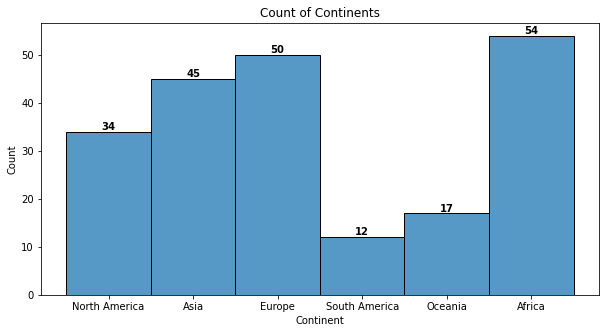

In [109]:
plt.figure(figsize = (10,5))

ax = sns.histplot(data = df, x = 'Continent')
for i in ax.containers:
    i.datavalues
    ax.bar_label(i,weight = 'bold')
plt.title('Count of Continents')

plt.show()

In [110]:
df.columns

Index(['Continent', 'Population', 'IMF_GDP', 'UN_GDP', 'GDP_per_capita'], dtype='object')

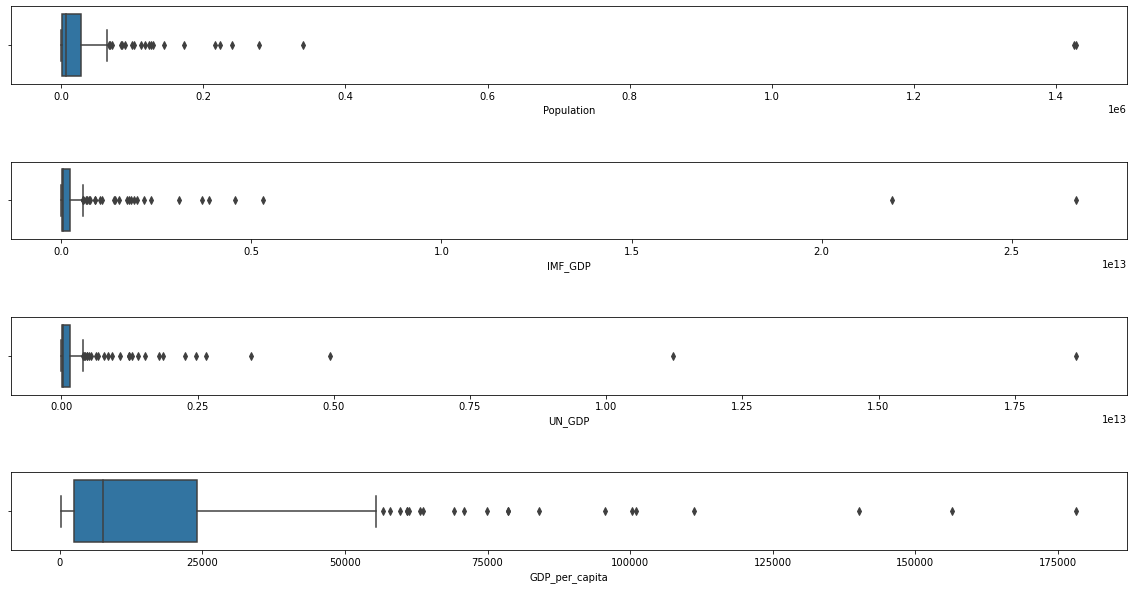

In [111]:
plt.figure(figsize = (20,10))

plt.subplot(4,1,1)
sns.boxplot(data = df, x = 'Population')

plt.subplot(4,1,2)
sns.boxplot(data = df, x = 'IMF_GDP')

plt.subplot(4,1,3)
sns.boxplot(data = df, x = 'UN_GDP')

plt.subplot(4,1,4)
sns.boxplot(data = df, x = 'GDP_per_capita')

plt.subplots_adjust(hspace = 1, wspace = .5)

plt.show();

### 3.2.1 Treatment of Outliers <a class="anchor" id="chapter3.2.1"></a>

In [112]:
df_pop_outliers = df.loc[df['Population'] >500000,:]
df_pop_outliers

,Continent,Population,IMF_GDP,UN_GDP,GDP_per_capita
1,Asia,1425671.35,2.186548e+13,1.121828e+13,15336.97
4,Asia,1428627.66,3.893670e+12,2.259642e+12,2725.46


In [113]:
df_IMF_outliers = df.loc[df['IMF_GDP'] > 10000000000000,:]
df_IMF_outliers

,Continent,Population,IMF_GDP,UN_GDP,GDP_per_capita
0,North America,339996.56,2.669515e+13,1.862448e+13,78515.94
1,Asia,1425671.35,2.186548e+13,1.121828e+13,15336.97


In [114]:
df_UN_outliers = df.loc[df['UN_GDP'] > 4000000000000,:]
df_UN_outliers

,Continent,Population,IMF_GDP,UN_GDP,GDP_per_capita
0,North America,339996.56,2.669515e+13,1.862448e+13,78515.94
1,Asia,1425671.35,2.186548e+13,1.121828e+13,15336.97
2,Asia,123294.51,5.291351e+12,4.936212e+12,42916.35


In [115]:
df_UN_outliers = df.loc[df['UN_GDP'] > 12500000000000,:]
df_UN_outliers

,Continent,Population,IMF_GDP,UN_GDP,GDP_per_capita
0,North America,339996.56,2.669515e+13,1.862448e+13,78515.94


#### The Repeated Outliers are China and United States and hence that can be removed to get better understanding of the data

In [116]:
df.drop(index = [0,1], inplace = True)


In [117]:
df.head(3)

,Continent,Population,IMF_GDP,UN_GDP,GDP_per_capita
2,Asia,123294.51,5.291351e+12,4.936212e+12,42916.35
3,Europe,83294.63,4.564778e+12,3.477796e+12,54802.79
4,Asia,1428627.66,3.893670e+12,2.259642e+12,2725.46


In [118]:
df.reset_index(inplace = True)

In [119]:
df.drop(columns = 'index', inplace = True)

In [120]:
df

,Continent,Population,IMF_GDP,UN_GDP,GDP_per_capita
0,Asia,123294.51,5.291351e+12,4.936212e+12,42916.35
1,Europe,83294.63,4.564778e+12,3.477796e+12,54802.79
2,Asia,1428627.66,3.893670e+12,2.259642e+12,2725.46
3,Europe,67736.80,3.686935e+12,2.647899e+12,54430.31
4,Europe,64756.58,3.086226e+12,2.465454e+12,47658.88
...,...,...,...,...,...
205,Africa,48109.01,0.000000e+00,8.288740e+10,1722.91
206,Asia,23227.01,0.000000e+00,2.216308e+10,954.19
207,Africa,12458.22,0.000000e+00,4.170356e+10,3347.47
208,North America,46.06,0.000000e+00,9.175505e+08,19919.90


## 3.3 Bivariate Analysis <a class="anchor" id="chapter3.3"></a>

In [121]:
df.columns

Index(['Continent', 'Population', 'IMF_GDP', 'UN_GDP', 'GDP_per_capita'], dtype='object')

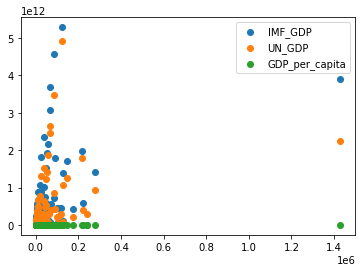

In [122]:
plt.scatter(data = df,x = 'Population', y = 'IMF_GDP')
plt.scatter(data = df,x = 'Population', y = 'UN_GDP')
plt.scatter(data = df,x = 'Population', y = 'GDP_per_capita')
plt.legend()
plt.show()

<AxesSubplot:>

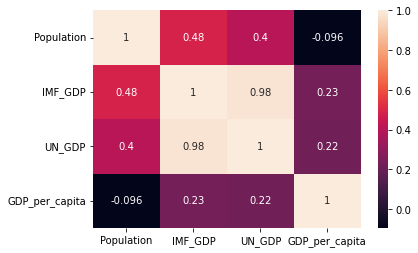

In [123]:
sns.heatmap(df.corr(), annot = True)

**Inferences**
1. The relation between IMF_GDP is strong with UN_GDP
2. The relation between the Population of the country is strong with UN_GDP and IMF_GDP

# 4. Spliting the data and Fitting the model <a class="anchor" id="chapter4"></a>

## 4.1  Converting Categorical Variables as Binary Vectors <a class="anchor" id="chapter4.1"></a>

In [124]:
df.columns

Index(['Continent', 'Population', 'IMF_GDP', 'UN_GDP', 'GDP_per_capita'], dtype='object')

In [125]:
# separating the categorical and continuous variables of the data frame
df_cat = df.select_dtypes(include = 'O')
df_cont = df.select_dtypes(exclude = 'O')

In [126]:
from sklearn.preprocessing import OneHotEncoder

In [127]:
ohe = OneHotEncoder()
ohe.fit(df_cat)

OneHotEncoder()

In [128]:
ohe.transform(df_cat)


<210x6 sparse matrix of type '<class 'numpy.float64'>'
	with 210 stored elements in Compressed Sparse Row format>

In [129]:
ohe.transform(df_cat).toarray()

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [130]:
ohe.get_feature_names_out()

array(['Continent_Africa', 'Continent_Asia', 'Continent_Europe',
       'Continent_North America', 'Continent_Oceania',
       'Continent_South America'], dtype=object)

In [131]:
df_cat_rev = pd.DataFrame(ohe.transform(df_cat).toarray(), columns = ohe.get_feature_names_out())
df_cat_rev

,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
205,1.0,0.0,0.0,0.0,0.0,0.0
206,0.0,1.0,0.0,0.0,0.0,0.0
207,1.0,0.0,0.0,0.0,0.0,0.0
208,0.0,0.0,0.0,1.0,0.0,0.0


In [132]:
df = df_cat_rev.join(df_cont)
df

,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Population,IMF_GDP,UN_GDP,GDP_per_capita
0,0.0,1.0,0.0,0.0,0.0,0.0,123294.51,5.291351e+12,4.936212e+12,42916.35
1,0.0,0.0,1.0,0.0,0.0,0.0,83294.63,4.564778e+12,3.477796e+12,54802.79
2,0.0,1.0,0.0,0.0,0.0,0.0,1428627.66,3.893670e+12,2.259642e+12,2725.46
3,0.0,0.0,1.0,0.0,0.0,0.0,67736.80,3.686935e+12,2.647899e+12,54430.31
4,0.0,0.0,1.0,0.0,0.0,0.0,64756.58,3.086226e+12,2.465454e+12,47658.88
...,...,...,...,...,...,...,...,...,...,...
205,1.0,0.0,0.0,0.0,0.0,0.0,48109.01,0.000000e+00,8.288740e+10,1722.91
206,0.0,1.0,0.0,0.0,0.0,0.0,23227.01,0.000000e+00,2.216308e+10,954.19
207,1.0,0.0,0.0,0.0,0.0,0.0,12458.22,0.000000e+00,4.170356e+10,3347.47
208,0.0,0.0,0.0,1.0,0.0,0.0,46.06,0.000000e+00,9.175505e+08,19919.90


#### Removing spaces from Column Names

In [133]:
df.rename(columns = {'Continent_North America':'Continent_North_America','Continent_South America':'Continent_South_America'}, inplace = True)

## 4.2 Spliting the Data <a class="anchor" id="chapter4.2"></a>

In [134]:
df.columns

Index(['Continent_Africa', 'Continent_Asia', 'Continent_Europe',
       'Continent_North_America', 'Continent_Oceania',
       'Continent_South_America', 'Population', 'IMF_GDP', 'UN_GDP',
       'GDP_per_capita'],
      dtype='object')

In [135]:
X = df.drop(columns = 'GDP_per_capita')
y = df['GDP_per_capita']

In [136]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 20)

In [137]:
X_train = pd.DataFrame(X_train)
X_train.shape

(147, 9)

In [138]:
X_test = pd.DataFrame(X_test)
X_test.shape

(63, 9)

In [139]:
y_train = pd.DataFrame(y_train)
y_train.shape

(147, 1)

In [140]:
y_test

134      739.50
5      60913.86
13      5083.15
46     52929.36
62       918.75
         ...   
21     63123.50
47     26078.39
147     6123.62
182     1745.12
133    33032.57
Name: GDP_per_capita, Length: 63, dtype: float64

## 4.3 Fitting the Linear Regression algorithm in model <a class="anchor" id="chapter4.3"></a>

In [141]:
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [142]:
y_pred = lr.predict(X_test)
y_pred

array([[ 2825.73613325],
       [47249.26801356],
       [17762.50546322],
       [16176.67168254],
       [-1961.85645743],
       [34639.17814271],
       [13306.2640409 ],
       [22682.39377993],
       [ 3608.68058753],
       [10974.21334742],
       [10680.3051257 ],
       [ 2858.85346979],
       [15180.58004939],
       [ 2923.79402664],
       [ 3881.86925173],
       [22620.43347125],
       [22669.46532001],
       [39063.83654381],
       [ 2237.63837782],
       [76064.39670151],
       [18920.91745499],
       [22407.5536847 ],
       [ 3037.68032358],
       [ 3500.99812862],
       [11277.73528954],
       [22363.29493188],
       [13497.84138484],
       [39190.42483347],
       [ 3750.73901067],
       [39255.34690293],
       [39869.83246719],
       [11152.48015431],
       [17692.62676325],
       [39203.55519651],
       [24182.88064324],
       [ 2188.06414774],
       [ 3489.48242655],
       [22659.31116984],
       [ 1721.19610915],
       [39608.65078367],


In [143]:
lr.coef_

array([[-1.42275244e+04, -2.05415604e+02,  2.12080306e+04,
         4.68665089e+03, -4.48108831e+03, -6.98011290e+03,
        -5.63260142e-02,  2.39354279e-08, -1.94636129e-08]])

In [144]:
lr.intercept_

array([17978.58665412])

In [145]:
x_range = [i for i in range(len(y_test))]

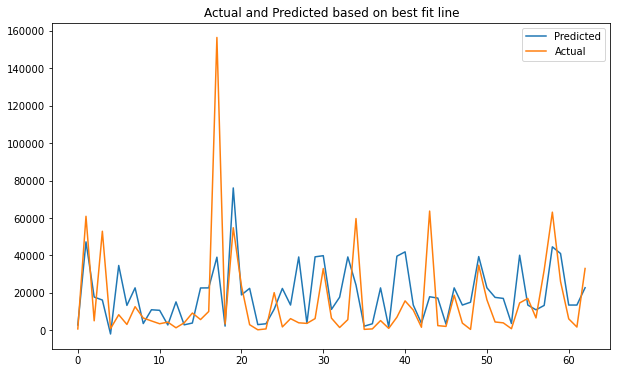

In [146]:
plt.figure(figsize = (10,6))

plt.plot(x_range,y_pred)
plt.plot(x_range,y_test)

plt.legend(['Predicted','Actual'])
plt.title('Actual and Predicted based on best fit line')

plt.show()

**Procedure**

1. Using feature engineering for categorical column.
2. Making the  GDP_per_capita as the target and analysing through the Linear Regression from sklearn Linear Model.

# 5. Reading Using Metrics <a class="anchor" id="chapter5"></a>

## 5.1 Reading using SKLearn Metrics <a class="anchor" id="chapter5.1"></a>

In [147]:
from sklearn.metrics import r2_score, mean_squared_error

In [148]:
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

486471039.11244124
0.21319687236964635


## 5.2 Reading using Statsmodel Metrics <a class="anchor" id="chapter5.2"></a>

In [149]:
import statsmodels.formula.api as smf

In [150]:
df.columns

Index(['Continent_Africa', 'Continent_Asia', 'Continent_Europe',
       'Continent_North_America', 'Continent_Oceania',
       'Continent_South_America', 'Population', 'IMF_GDP', 'UN_GDP',
       'GDP_per_capita'],
      dtype='object')

In [151]:
'+'.join(X)

'Continent_Africa+Continent_Asia+Continent_Europe+Continent_North_America+Continent_Oceania+Continent_South_America+Population+IMF_GDP+UN_GDP'

In [152]:
# removing spaces from column names


In [153]:
result = smf.ols(formula = 'GDP_per_capita ~ Continent_Africa+Continent_Asia+Continent_Europe+Continent_North_America+Continent_Oceania+Continent_South_America+Population+IMF_GDP+UN_GDP', data = df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         GDP_per_capita   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     10.46
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           3.12e-12
Time:                        23:43:21   Log-Likelihood:                -2410.3
No. Observations:                 210   AIC:                             4839.
Df Residuals:                     201   BIC:                             4869.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [154]:
result1 = smf.ols(formula = 'GDP_per_capita ~ Continent_Africa+Continent_Europe+Continent_North_America+Population+IMF_GDP', data = df).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:         GDP_per_capita   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     15.72
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           4.39e-13
Time:                        23:43:21   Log-Likelihood:                -2412.7
No. Observations:                 210   AIC:                             4837.
Df Residuals:                     204   BIC:                             4857.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

In [155]:
result2 = smf.ols(formula = 'IMF_GDP ~ UN_GDP', data = df).fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                IMF_GDP   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     4073.
Date:                Mon, 12 Jun 2023   Prob (F-statistic):          1.41e-138
Time:                        23:43:21   Log-Likelihood:                -5718.6
No. Observations:                 210   AIC:                         1.144e+04
Df Residuals:                     208   BIC:                         1.145e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.465e+10    1.2e+10      2.051      0.0

In [156]:
result4 = smf.ols(formula = 'Population ~ IMF_GDP', data = df).fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:             Population   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     63.63
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           9.90e-14
Time:                        23:43:21   Log-Likelihood:                -2699.0
No. Observations:                 210   AIC:                             5402.
Df Residuals:                     208   BIC:                             5409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9410.3619   6898.333      1.364      0.1

In [157]:
result5 = smf.ols(formula = 'Population ~ UN_GDP', data = df).fit()
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:             Population   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     40.49
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           1.24e-09
Time:                        23:43:21   Log-Likelihood:                -2708.3
No. Observations:                 210   AIC:                             5421.
Df Residuals:                     208   BIC:                             5427.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.384e+04   7153.570      1.935      0.0

In [158]:
result3 = smf.ols(formula = 'IMF_GDP ~ UN_GDP', data = df).fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                IMF_GDP   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     4073.
Date:                Mon, 12 Jun 2023   Prob (F-statistic):          1.41e-138
Time:                        23:43:21   Log-Likelihood:                -5718.6
No. Observations:                 210   AIC:                         1.144e+04
Df Residuals:                     208   BIC:                         1.145e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.465e+10    1.2e+10      2.051      0.0

## 6. Conclusion <a class="anchor" id="chapter6"></a>

**Takeaways**

The probability of finding the target in the table, as indicated by the sklearn results, appears to be very low. On the other hand, the correlation matrix in Stats model provides evidence supporting the statement that there is a strong relationship between IMF_GDP and UN_GDP, as indicated by an R-squared value of 0.951.

# Thank You